In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv('cardekho_dataset.csv')

In [5]:
dataset.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


# Data Cleaning

In [4]:
dataset.isnull().sum()

car_name             0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   vehicle_age        15411 non-null  int64  
 2   km_driven          15411 non-null  int64  
 3   seller_type        15411 non-null  object 
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   mileage            15411 non-null  float64
 7   engine             15411 non-null  int64  
 8   max_power          15411 non-null  float64
 9   seats              15411 non-null  int64  
 10  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.3+ MB


# Encoding

In [6]:
car_name_le = LabelEncoder()
dataset['car_name'] = car_name_le.fit_transform(dataset['car_name'])

In [7]:
seller_type_le = LabelEncoder()
dataset['seller_type'] = seller_type_le.fit_transform(dataset['seller_type'])

In [8]:
transmission_type_le = LabelEncoder()
dataset['transmission_type'] = transmission_type_le.fit_transform(dataset['transmission_type'])

In [9]:
fuel_type_le = LabelEncoder()
dataset['fuel_type'] = fuel_type_le.fit_transform(dataset['fuel_type'])

In [10]:
dataset.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,65,9,120000,1,4,1,19.70,796,46.30,5,120000
1,34,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,40,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,65,9,37000,1,4,1,20.92,998,67.10,5,226000
4,20,6,30000,0,1,1,22.77,1498,98.59,5,570000


In [11]:
input_data = dataset.iloc[:,:-1]
output_data = dataset['selling_price']

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns = input_data.columns)

In [14]:
input_data

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,0.137617,0.983562,1.247335,1.189966,1.001423,0.510503,-0.000276,-1.324259,-1.263352,-0.403022
1,-0.874864,-0.343933,-0.690016,1.189966,1.001423,0.510503,-0.192071,-0.554718,-0.432571,-0.403022
2,-0.678900,1.647309,0.084924,1.189966,1.001423,0.510503,-0.647583,-0.554718,-0.479113,-0.403022
3,0.137617,0.983562,-0.360667,1.189966,1.001423,0.510503,0.292211,-0.936610,-0.779312,-0.403022
4,-1.332113,-0.012060,-0.496281,-0.768028,-0.967649,0.510503,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...
15406,-0.711560,0.983562,-0.869744,-0.768028,1.001423,0.510503,0.026096,-0.767733,-0.757204,-0.403022
15407,0.398903,-1.339555,-0.728763,-0.768028,1.001423,0.510503,-0.527711,-0.216964,-0.220803,2.073444
15408,1.313402,-0.012060,0.220539,-0.768028,-0.967649,0.510503,0.344954,0.022918,0.068225,-0.403022
15409,0.104957,-0.343933,72.541850,-0.768028,-0.967649,0.510503,-0.887326,1.329794,0.917158,2.073444


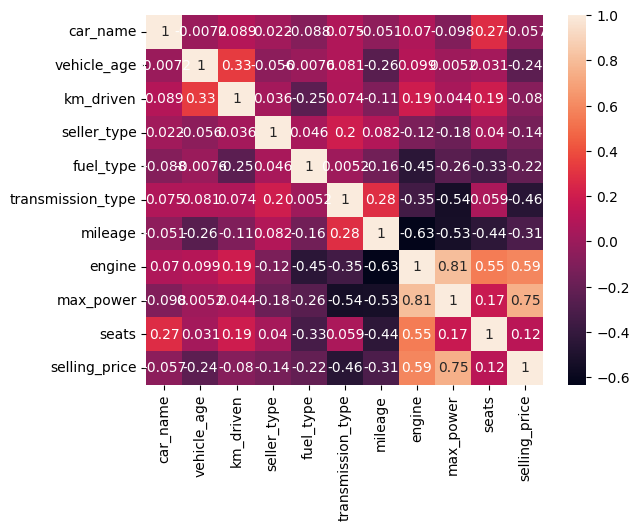

In [15]:
sns.heatmap(data = dataset.corr(), annot = True)
plt.show()

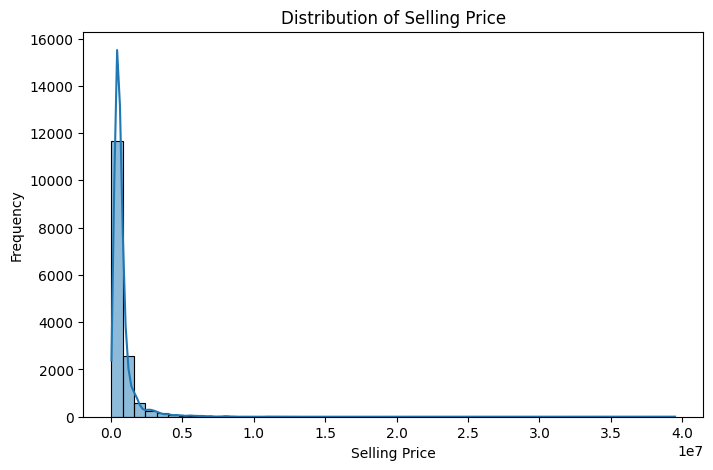

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(output_data, bins=50, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


# Train and Test Data

In [17]:
import numpy as np
output_data_log = np.log1p(output_data)  # Log transformation to reduce skewness

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data_log, test_size=0.2, random_state=42)

In [19]:
# x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(86.55124333404432, 86.31172720238555)

In [23]:
mean_squared_error(y_test, lr.predict(x_test)), mean_absolute_error(y_test, lr.predict(x_test))

(0.06839269055320044, 0.199329019346056)

# Decision Tree

In [24]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(85.6938840084957, 85.02352112402001)

In [25]:
mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(0.07482914027838136, 0.20921580200646817)

# Random Forest

In [26]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(98.87149800918039, 93.341634699202)

In [27]:
mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(0.03326815036057782, 0.13202356391859393)

# SVM

In [28]:
sv = SVR()
sv.fit(x_train, y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(93.33404617285599, 92.53148545684627)

In [34]:
mean_squared_error(y_test, sv.predict(x_test)), mean_absolute_error(y_test, sv.predict(x_test))

(0.037316015803762294, 0.14344982570744463)

# KNN

In [29]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(94.57433972957926, 91.7680397435594)

In [35]:
mean_squared_error(y_test, knn.predict(x_test)), mean_absolute_error(y_test, knn.predict(x_test))

(0.04113052967231234, 0.1466294209353047)

## Choosing Random Forest Regressor Model

# Predicting Price

In [1]:
def predict_selling_price():
    print("Enter details of the car:")
    car_name = input("Car Name (as a string, e.g., 'Maruti Swift'): ")
    vehicle_age = float(input("Vehicle Age (in years): "))
    km_driven = float(input("Kilometers Driven: "))
    seller_type = int(input("Seller Type (0: Individual, 1: Dealer): "))
    fuel_type = int(input("Fuel Type (0: Petrol, 1: Diesel, 2: CNG): "))
    transmission_type = int(input("Transmission Type (0: Manual, 1: Automatic): "))
    mileage = float(input("Mileage (km/l or km/kg): "))
    engine = float(input("Engine (CC): "))
    max_power = float(input("Max Power (BHP): "))
    seats = int(input("Number of Seats: "))

    # Encode the car name using the trained LabelEncoder
    if car_name in car_name_le.classes_:
        car_name_encoded = car_name_le.transform([car_name])[0]
    else:
        print(f"Error: The car name '{car_name}' is not in the training data.")
        return

    # Create a DataFrame for the input
    user_data = pd.DataFrame([[
        car_name_encoded, vehicle_age, km_driven, seller_type, fuel_type,
        transmission_type, mileage, engine, max_power, seats
    ]], columns=input_data.columns)

    # Preprocess the input data (standardize using the same scaler)
    user_data_scaled = ss.transform(user_data)

    # Predict the selling price (apply reverse log transformation)
    selling_price_log = rf.predict(user_data_scaled)  # Prediction in log scale
    predicted_price = np.expm1(selling_price_log)  # Reverse log transformation

    # Display the predicted price
    print(f"\nThe predicted selling price of the car is: ₹{predicted_price[0]:,.2f}")

# Call the function
predict_selling_price()


Enter details of the car:


Car Name (as a string, e.g., 'Maruti Swift'):  Hyundai Venue
Vehicle Age (in years):  5
Kilometers Driven:  40000
Seller Type (0: Individual, 1: Dealer):  0
Fuel Type (0: Petrol, 1: Diesel, 2: CNG):  0
Transmission Type (0: Manual, 1: Automatic):  0
Mileage (km/l or km/kg):  17.5
Engine (CC):  1190
Max Power (BHP):  75
Number of Seats:  5


NameError: name 'car_name_le' is not defined